In [51]:
import numpy as np

def init_params(nx, nh, ny):
    """Initializes the weights of an MLP."""
    params = {}
    params['W1'] = np.random.randn(nh, nx) * 0.3  # Hidden layer weights
    params['b1'] = np.zeros((nh, 1))  # Hidden layer biases
    params['W2'] = np.random.randn(ny, nh) * 0.3  # Output layer weights
    params['b2'] = np.zeros((ny, 1))  # Output layer biases
    return params

def softmax(z):
    assert len(z.shape) == 2


    s = np.max(z, axis=1)
    s = s[:, np.newaxis] # necessary step to do broadcasting
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis] # dito
    return e_x / div


def forward(params, X):
    """Performs the forward pass of the MLP."""
    Z1 = np.dot(X, params['W1'].T).T + params['b1']
    A1 = np.tanh(Z1)  # Activation function for hidden layer
    Z2 = np.dot(A1.T, params['W2'].T).T + params['b2']
    Yhat = softmax(Z2)  # Activation function for output layer softamx
    return Yhat, Z1, A1

def loss_accuracy(Yhat, Y):
    """Calculates the cross-entropy loss and accuracy."""
    m = Y.shape[0]
    loss = -np.mean(np.sum(Y * np.log(Yhat.T + 1e-8), axis=1))
    accuracy = 100 * np.mean(np.argmax(Yhat.T, axis=1) == np.argmax(Y, axis=1))
    return loss, accuracy

def backward(params, outputs, Y, X):
    """Computes the gradients of the loss with respect to the parameters."""
    Yhat, Z1, A1 = outputs
    m = Y.shape[0]

    dZ2 = Yhat.T - Y
    dW2 = np.dot(dZ2.T, A1.T) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    db2 = db2.T

    dA1 = np.dot(dZ2, params['W2']) * (1 - np.power(A1, 2)).T  # Derivative of tanh
    dZ1 = dA1
    dW1 = np.dot(dZ1.T, X) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    db1 = db1.T

    grads = {'W1': dW1, 'b1': db1, 'W2': dW2, 'b2': db2}
    #print(grads["b2"].shape[1])
    return grads

def sgd(params, grads, eta):
    """Applies mini-batch SGD to update the parameters."""
    for key in params.keys():
        params[key] -= eta * grads[key]

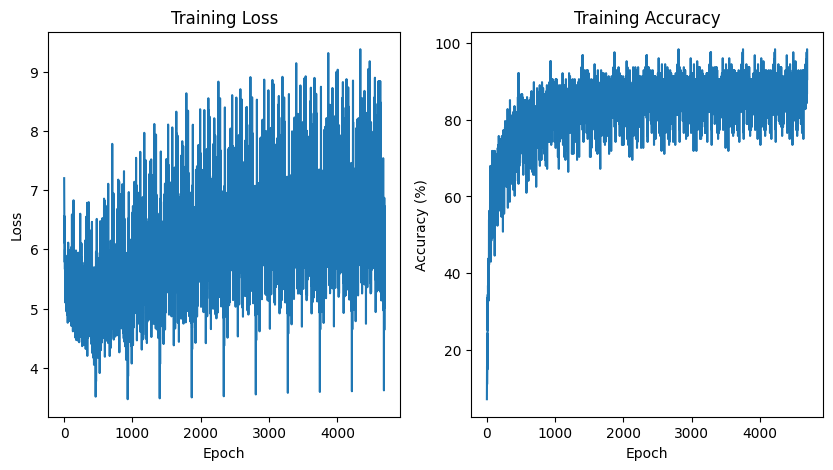

Test Loss: 10.0737, Test Accuracy: 87.20%


In [84]:
import matplotlib.pyplot as plt

# Load MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Preprocess data
X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0
Y_train = np.eye(10)[Y_train]  # One-hot encode labels
Y_test = np.eye(10)[Y_test]

# Hyperparameters
nx = X_train.shape[1]
nh = 132
ny = 10
epochs = 10
mini_batch_size = 128
eta = 0.05

# Initialize parameters
params = init_params(nx, nh, ny)

# Training loop
loss_history = []
accuracy_history = []
for epoch in range(epochs):
    for i in range(0, X_train.shape[0], mini_batch_size):
        X_batch = X_train[i:i + mini_batch_size]
        Y_batch = Y_train[i:i + mini_batch_size]

        # Forward pass
        Yhat, Z1, A1 = forward(params, X_batch)

        # Backward pass
        grads = backward(params, (Yhat, Z1, A1), Y_batch, X_batch)

        # Update parameters
        sgd(params, grads, eta)

        # Calculate and store loss and accuracy
        loss, accuracy = loss_accuracy(Yhat, Y_batch)
        loss_history.append(loss)
        accuracy_history.append(accuracy)
        #if accuracy > 90:
            #break
    if accuracy_history[-1] > 99:
        break

# Plot loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title("Training Accuracy")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch")
plt.show()

# Evaluate on test set
Yhat_test, _, _ = forward(params, X_test)
test_loss, test_accuracy = loss_accuracy(Yhat_test, Y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

